# P1: Modelado de un vehículo

# P2: Segimiento de Caminos

# P3: SLAM basado en EFK

# P4: Evitar Obstáculos

# P5: Planificación de Caminos - Dijkstra

# P6: Planificación de Caminos - A*

<div style="color: red;">

Dudas
    
    
</div>

\newpage

# Navegación Autónoma

Se desea dotar a un robot móvil de la capacidad de navegación completamente autónoma, es decir, debe ser capaz de resolver problemas como planificar caminos para recorrer largas distancias y, al mismo tiempo, asegurar que realiza toda la trayectoria de forma segura sin colisionar con los obstáculos del entorno. Esta navegación autónoma debe resolver estos problemas en dos niveles funcionales distintos: 

1. Navegación global o planificación de caminos: encontrar un camino óptimo entre puntos distantes en el espacio. Este tipo de planificación se realiza a nivel de tarea.
2. Navegación local o reactiva: evitar obstáculos durante el avance del robot en el entorno. Este comportamiento es cercano a la acción (nivel de ejecución) y debe responder rápidamente a los estímulos externos con la información sensorial captada por el robot.


Por tanto, para completar la navegación autónoma es necesario resolver ambos problemas, que ya han sido resueltos en las prácticas anteriores. Para ello, se proporcionan: 

- mapa2.pgm: archivo en formato de imagen con el mapa del entorno y la representación de los obstáculos.
- mapa2.m: datos del mapa topológico con la lista de nodos del grafo y la matriz de costes.
- 
El mapa completo del entorno que describen estos archivos que se proporcionan en el Campus Virtual de la asignatura, superpuesto al grafo que representa los nodos topológicos es el siguiente:

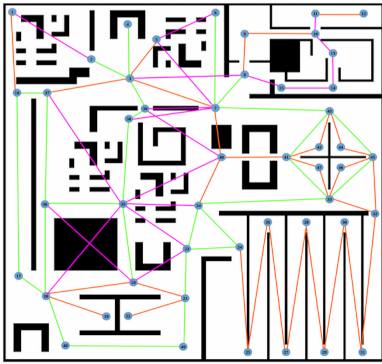

\newpage

## Ejercicio

Implementar un programa de Matlab que utilice la planificación de caminos de Dijkstra (PRÁCTICA 5) y evite obstáculos con el método de campos potenciales (PRÁCTICA 4). El programa debe preguntar los nodos de inicio y destino, y representar gráficamente el mapa con la trayectoria del robot. Debe indicar con un mensaje si se ha podido llegar al destino. 

### Implementación

La función **nav_autonoma** implementa la funcionalidad y devuelve true cuando es posible llegar al destino. El código completo se ha añadido en el apéndice al final de la práctica

Para invocar a la función desde Matlab, es necesario añadir al path el código de las prácticas 5 y y 6 establecer el modo de navegación (bRobusta, ver ejercicio 7.2) y el algoritmo para calcular la ruta (bAestrella, ver ejercicio 7.3):

```C
clc;
clearvars;
close all;
addpath('../P5');
addpath('../P6');
termina = nav_autonoma(true, true) 
bRobusta = false;
bAestrella = false;
termina = nav_autonoma(bRobusta, bAestrella);
```

#### Inicialización

1. Se configuran los parámetros para el cálculo de campos potenciales
2. Se carga el mapa (mapa2) y su imagen, que se convierte con binaryOccupancyMap
3. Se piden los nodos de origen y destino
4. Se calcula el camino utilizando el algoritmo Dijkstra implementado en la práctica 5
5. Se visualiza el mapa con el título indicando la ruta y su coste

#### Bucle principal

El bucle principal (for) se encarga de ir cambiando de nodo hasta llegar al final del camino a medida que se va llegando al nodo anterior.

- En cada paso hay un bucle interior (while) que intenta llegar al siguiente punto o termina cuando el número de iteraciones se agota (parámetro MAX_ITER)
- Si el bucle interior no consigue llegar a su destino, se muestra un mensaje de error y se sale de la función con false
- Si se completan todos los paso se muestra el mensaje corresponiente y se sale con true

#### Bucle interior

En el bucle interior se calculan las fuerzas de atracción y repulsión. Para el caso de las fuerzas de repulsión, la distancia a los obstáculos alrededor del robot se obtiene ejecutando la función rayIntersection


\newpage

### Pruebas

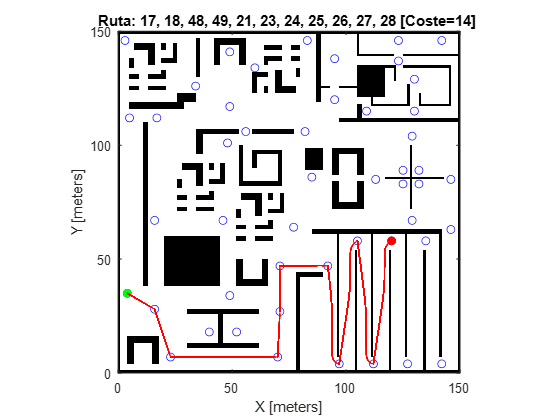


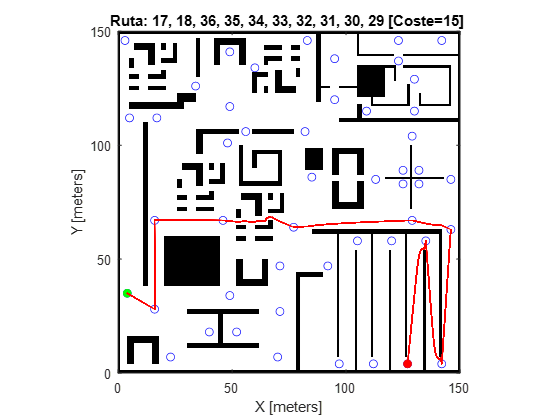


\newpage

## Ejercicio

Realizar la trayectoria partiendo del nodo 1 hacia un destino en la parte derecha superior del mapa. Intentar atravesar la parte inferior derecha del mapa entre los nodos 24 y 32. ¿Es posible alcanzar el objetivo en esas situaciones?, ¿a qué se debe el problema para completar dichos caminos?. Proponer una mejora a la navegación autónoma implementada para resolver esta situación. 


### Intento de atravesar la parte de arriba

El robot se bloque en cuanto llega un mínimo local que se corresponde con una zona cóncava:

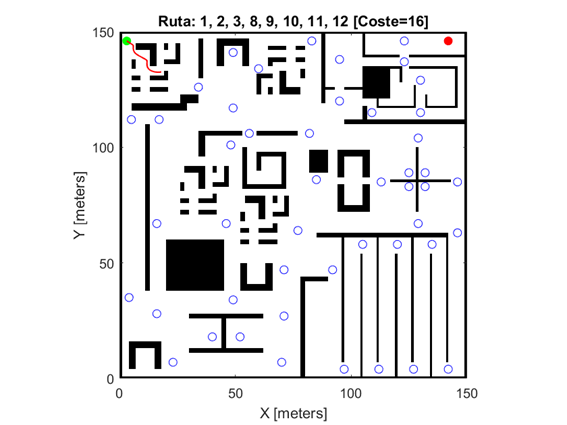


\newpage

### Navegación entre nodos 24 y 32

El algoritmo Dijkstra calcula el camino óptimo, por lo que el robot no se mete en la zona inferior derecha, ya que es mucho más largo llegar al destino por ese camino

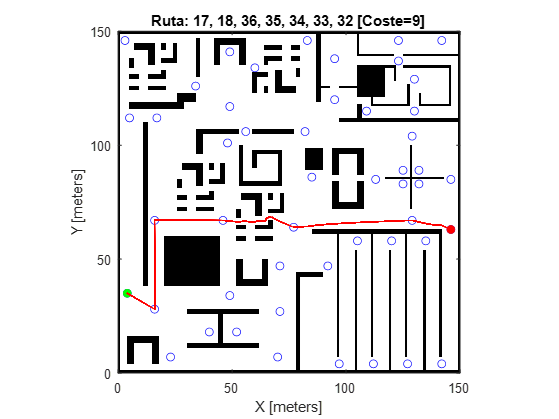


\newpage

### Mejora para evitar mínimos locales

La solución a este problema pasa por guardar en memoria un historial con todas las posiciones visitadas, de forma que se calcula una tercera fuerza de repulsión Fmem que separa al robot de los puntos por los que ya ha pasado.

Para permitir que el robot funcione en la modalidad robusta y la modalidad normal, se multiplica la fuerza de la memoria por una variable booleana bRobusta que se pasa como parámetro a la función de navegación:

```C
    if ~exist('historial','var')
        historial = [];
    end
    historial = [historial; robot(1:2)];

    Fmem = [0, 0];
    for h = 1:size(historial,1)
        d_mem = norm(robot(1:2) - historial(h,:));
        if d_mem < 5 && d_mem > 0.1
            Fmem = Fmem + 20 * (robot(1:2) - historial(h,:)) / (d_mem^2);
        end
    end

    F = Fattr + Frep + Fmem * bRobusta;
```

\newpage

### Intento de atravesar la parte de arriba

Una vez implementada la mejora, vemos que el robot llega al destino:

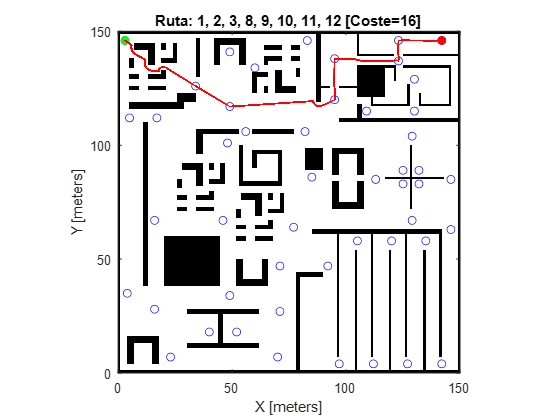

\newpage

En la ruta del nodo 1 al 15 se aprecia cómo el robot "rebota" en una zona cóncava y consigue llegar al destino

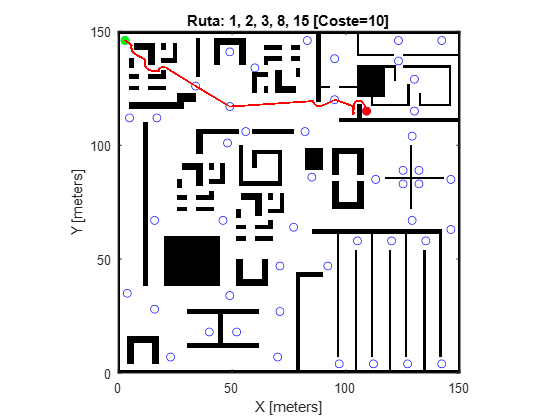


\newpage

### Navegación entre los nodos 21 y 24

Probamos puntos intermedios en el laberinto para verificar que el robot puede navegar por la parte inferior derecha

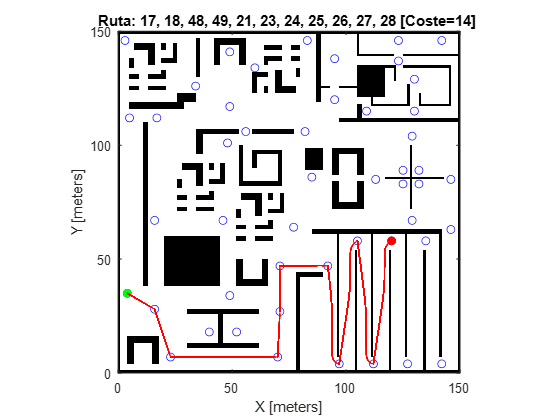

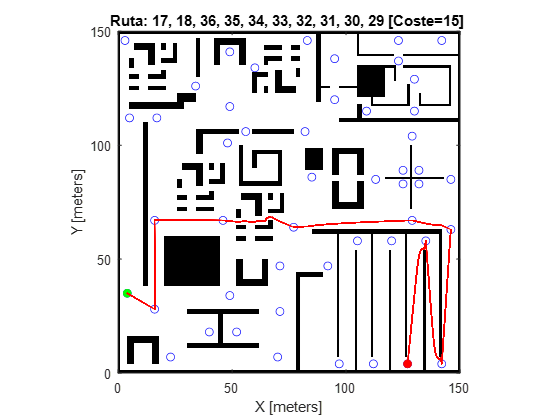


\newpage

## Ejercicio

Si se desea utilizar el algoritmo A* para realizar una planificación de caminos más eficiente desde el punto de vista computacional, es necesario definir una heurística. Se propone definir una heurística consistente y reemplazar el algoritmo de Dijkstra por el A* para la planificación de caminos. 


**NOTA**: si se utiliza la distancia euclídea para determinar la heurística, es necesario calcular una nueva matriz de costes también basada en la distancia euclídea entre nodos, para que la heurística sea consistente. Para construir esta nueva matriz de costes es necesario utilizar la matriz de costes dada como dato del problema, para conocer la adyacencia de los nodos del grafo. 


### Planificación de la ruta

Añadimos un nuevo parámetro para determinar si la ruta se calcula con Dijkstra o con A*

En el caso de A*, recalculamos la matriz ade costes para sustituir los valores con la distancia entre los puntos que están conectados, y calculamos la heurística de cada dos puntos como la distancia euclídea en línea recta entre ellos:

```C
%% PLANIFICACION GLOBAL CON DIJKSTRA

if bAestrella % Se calcula la ruta óptima mediante el algoritmo de A*
    n = length(nodos);
    costes2 = zeros(n);
    heur = zeros(n);
    for f = 1: n 
        for c = 1:n 
            dist = norm(nodos(f, 2:3)-nodos(c, 2:3));
            heur(f, c) = dist;
            if costes(f, c) > 0
                costes2(f, c) = dist;
            end
        end  
    end
    [coste, camino] = aestrella(costes2, heur, origen, destino)


else % Se calcula la ruta óptima mediante el algoritmo de Dijkstra
    [coste, camino] = Dijkstra(costes, origen, destino);  
end
```

\newpage

### Pruebas

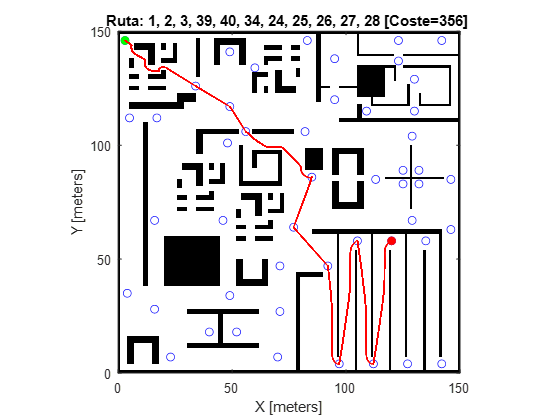


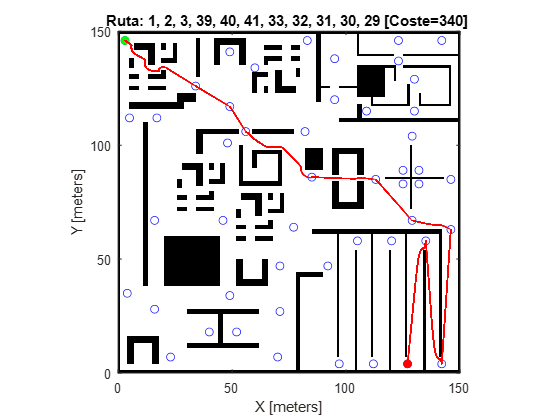

\newpage

## Apéndice - Código completo

```C
function [llegada] = nav_autonoma(bRobusta, bAestrella)

%% PARAMETROS DE CAMPOS POTENCIALES
%addpath("../P4");
v = 0.4;        % Velocidad del robot
alfa = 100;     % Constante de atracción
beta = 100;     % Constante de repulsión
D = 4;          % Radio de influencia de obstáculos
MAX_ITER = 1000; % Máximo de iteraciones intentando llegar al destino
llegada = true; % Por defecto indicamos que el robot llega a su destino

%% SENSOR LIDAR CONFIGURADO
max_rango = 10;
angulos = -pi/2:(pi/180):pi/2;


%% CARGA DEL MAPA Y DATOS
mapa = imread("mapa2.pgm");
map_bin = imbinarize(imcomplement(mapa));  % Obstáculos a negro, espacio libre blanco
m = binaryOccupancyMap(map_bin);
mapa2;  % Carga 'nodos' y 'costes'

%% PETICIÓN DE ORIGEN Y DESTINO
origen = input("Introduce el nodo de origen: ");
destino = input("Introduce el nodo de destino: ");

%% PLANIFICACION GLOBAL CON DIJKSTRA

if bAestrella % Se calcula la ruta óptima mediante el algoritmo de A*
    n = length(nodos);
    costes2 = zeros(n);
    heur = zeros(n);
    for f = 1: n 
        for c = 1:n 
            dist = norm(nodos(f, 2:3)-nodos(c, 2:3));
            heur(f, c) = dist;
            if costes(f, c) > 0
                costes2(f, c) = dist;
            end
        end  
    end
    [coste, camino] = aestrella(costes2, heur, origen, destino)


else % Se calcula la ruta óptima mediante el algoritmo de Dijkstra
    [coste, camino] = Dijkstra(costes, origen, destino);  
end

%% VISUALIZACION DEL ENTORNO
figure;
show(m); hold on;
plot(nodos(:,2), nodos(:,3), 'bo');
plot(nodos(origen,2), nodos(origen,3), 'go', 'MarkerFaceColor', 'g');
plot(nodos(destino,2), nodos(destino,3), 'ro', 'MarkerFaceColor', 'r');
title(sprintf("Ruta: %s%0.0f [Coste=%0.0f]", ...
    sprintf("%0.0f, ", camino(1:end-1)), destino, coste));
axis equal; xlim([0 150]); ylim([0 150]);



%% MOVIMIENTO ENTRE CADA PAR DE NODOS CON CAMPOS POTENCIALES
for k = 2:length(camino)
    origen_pos = nodos(camino(k-1),2:3);
    destino_pos = nodos(camino(k),2:3);
    robot = [origen_pos, 0];
    path = robot;
    iter = 0;

    while norm(destino_pos - robot(1:2)) > 0.5 && iter < MAX_ITER
        % Fuerza atractiva que empuja al robot hacia el nodo destino local
        Fattr = alfa * (destino_pos - robot(1:2));

        % Se simula un sensor LIDAR que detecta obstáculos cercanos en el entorno
        obs = SimulaLidar(robot, m, angulos, max_rango);
        Frep = [0, 0];

        % Fuerza repulsiva que evita que el robot se acerque demasiado a los obstáculos detectados
        for i = 1:size(obs, 1)
            if ~isnan(obs(i,1))
                d = norm(robot(1:2) - obs(i,:));
                if d < D
                    u = (robot(1:2) - obs(i,:)) / d;
                    Frep = Frep + beta * (1/d - 1/D) * u / d^2;
                end
            end
        end

        % --- Memoria de posiciones visitadas ---
        % Guardamos todas las posiciones recorridas por el robot para generar una fuerza repulsiva
        % adicional que lo empuje fuera de zonas ya visitadas (evita estancamientos)
        if ~exist('historial','var')
            historial = [];
        end
        historial = [historial; robot(1:2)];

        % Inicializa la fuerza de memoria. Por cada punto del historial, si el robot está demasiado cerca,
        % se le aplica una fuerza que lo aleja proporcionalmente (inversa al cuadrado de la distancia)
        Fmem = [0, 0];
        for h = 1:size(historial,1)
            d_mem = norm(robot(1:2) - historial(h,:));
            if d_mem < 5 && d_mem > 0.1
                Fmem = Fmem + 20 * (robot(1:2) - historial(h,:)) / (d_mem^2);
            end
        end

        % Fuerza total resultante que combina atracción al objetivo, repulsión de obstáculos y memoria de posiciones pasadas
        F = Fattr + Frep + Fmem * bRobusta;
        if norm(F) == 0
            break;
        end
        F = F / norm(F);

        % Movimiento
        robot(1) = robot(1) + v * cos(atan2(F(2), F(1)));
        robot(2) = robot(2) + v * sin(atan2(F(2), F(1)));
        path = [path; robot];

        % Se dibuja la trayectoria recorrida por el robot en cada paso del bucle
        plot(path(:,1), path(:,2), 'r-', 'LineWidth', 1);
        drawnow;
        iter = iter + 1;
    end % while del siguiente punto

    termina_bien = iter < MAX_ITER;
    if iter >= MAX_ITER
        llegada = false;
        disp('No se pudo completar el camino');
        return;
    end    
end % for del camino
disp('Simulación completada con éxito');
end

%% FUNCION DE SIMULACION LIDAR
function obs = SimulaLidar(robot, mapa, angulos, max_rango)
    obs = rayIntersection(mapa, robot, angulos, max_rango);
end

```